<a href="https://colab.research.google.com/github/ManuelBaq/Customer-Experience-Analysis/blob/main/Customer_Experience_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Leer archivo .csv

import pandas as pd
import matplotlib.pyplot as plt


cs_experience = pd.read_csv('/content/drive/MyDrive/DataFrames_Kaggle/customer_experience_data.csv', encoding='windows-1252')
# encoding='windows-1252' es importante para no tener error en la lectura del archivo
# print(cs_experience.head())
cs_experience.head(5)

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


In [ ]:
# Conocer el nombre de las columnas con el método .columns
print(cs_experience.columns)

Index(['Customer_ID', 'Age', 'Gender', 'Location', 'Num_Interactions',
       'Feedback_Score', 'Products_Purchased', 'Products_Viewed',
       'Time_Spent_on_Site', 'Satisfaction_Score', 'Retention_Status',
       'Gender_Encoded', 'Location_Encoded', 'Retention_Status_Encoded'],
      dtype='object')


In [ ]:
# Conocer las dimensiones del DataFrame con método .shape
num_rows, num_columns = cs_experience.shape
print('Número de filas: ', num_rows)
print('Número de columnas: ', num_columns)

Número de filas:  1000
Número de columnas:  14


In [ ]:
# Obtener los datos de solo una de las columnas
print(cs_experience['Location'])
print('*****************************')
# Obtener un número de filas determinado en esa columna
n_rows = cs_experience['Location']
print(n_rows[3:10])

0         Urban
1      Suburban
2         Urban
3      Suburban
4         Urban
         ...   
995       Rural
996       Rural
997       Rural
998       Rural
999       Rural
Name: Location, Length: 1000, dtype: object
*****************************
3    Suburban
4       Urban
5       Rural
6    Suburban
7       Rural
8    Suburban
9       Rural
Name: Location, dtype: object


In [ ]:
# Obtener los datos estadisticos generales con el método .describe() para cada fila con valor numérico
summary = cs_experience.describe()
print(summary)

       Customer_ID         Age  Num_Interactions  Feedback_Score  \
count  1000.000000  1000.00000       1000.000000     1000.000000   
mean    500.500000    43.81900          7.545000        2.985000   
std     288.819436    14.99103          4.016978        1.418022   
min       1.000000    18.00000          1.000000        1.000000   
25%     250.750000    31.00000          4.000000        2.000000   
50%     500.500000    44.00000          8.000000        3.000000   
75%     750.250000    56.00000         11.000000        4.000000   
max    1000.000000    69.00000         14.000000        5.000000   

       Products_Purchased  Products_Viewed  Time_Spent_on_Site  \
count         1000.000000      1000.000000         1000.000000   
mean            10.417000        27.370000           32.274399   
std              5.345623        12.939572           15.734978   
min              1.000000         5.000000            5.114208   
25%              6.000000        17.000000           18.8

In [ ]:
# Verificar si hay datos faltantes con método .isna()
missing_data = cs_experience.isnull().sum() # suma todos los datos faltantes por columnas
print(missing_data) # De acuerdo al resultado no hay datos faltantes

Customer_ID                 0
Age                         0
Gender                      0
Location                    0
Num_Interactions            0
Feedback_Score              0
Products_Purchased          0
Products_Viewed             0
Time_Spent_on_Site          0
Satisfaction_Score          0
Retention_Status            0
Gender_Encoded              0
Location_Encoded            0
Retention_Status_Encoded    0
dtype: int64


In [ ]:
# Hay datos duplicados?
duplicated = cs_experience.duplicated().sum()
print(duplicated)

0


In [ ]:
# Extraer los valores unicos por columna (las categorias que pueden estar presentes)
unique_values = {col: cs_experience[col].unique() for col in cs_experience.columns} # Crear un diccionario para recorrer los valores por columna

for col, values in unique_values.items():
  print(f'Columna: {col}')
  print(f'Número de valores únicos: {len(values)}')
  print(f'Valores únicos: {values[:10]}')
  print('-' *50)

Columna: Customer_ID
Número de valores únicos: 1000
Valores únicos: [ 1  2  3  4  5  6  7  8  9 10]
--------------------------------------------------
Columna: Age
Número de valores únicos: 52
Valores únicos: [56 69 46 32 60 25 38 36 40 28]
--------------------------------------------------
Columna: Gender
Número de valores únicos: 2
Valores únicos: ['Male' 'Female']
--------------------------------------------------
Columna: Location
Número de valores únicos: 3
Valores únicos: ['Urban' 'Suburban' 'Rural']
--------------------------------------------------
Columna: Num_Interactions
Número de valores únicos: 14
Valores únicos: [11 10  5 14  6  8 12  1  9  2]
--------------------------------------------------
Columna: Feedback_Score
Número de valores únicos: 5
Valores únicos: [4 3 5 1 2]
--------------------------------------------------
Columna: Products_Purchased
Número de valores únicos: 19
Valores únicos: [18  2 11  6  8  4  5 15 13  7]
-----------------------------------------------

In [ ]:
# Eliminar las filas duplicadas (si hubieran)

# data_cleaned = cs_experience.drop_duplicates() # Para eliminar los duplicados

# data_cleaned = cs_experience.dropna(subset=['age']) # eliminar los datos faltantes y expecificar la columna con 'subset'

In [ ]:
# Obtener el tipo de dato por columna con el método .info()
data_type = cs_experience.info()
print(data_type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

In [ ]:
# Obtener los valores maximos y minimos por columna
print(cs_experience.max())
print('*************************')
print(cs_experience.min())

Customer_ID                      1000
Age                                69
Gender                           Male
Location                        Urban
Num_Interactions                   14
Feedback_Score                      5
Products_Purchased                 19
Products_Viewed                    49
Time_Spent_on_Site          59.947722
Satisfaction_Score                 10
Retention_Status             Retained
Gender_Encoded                      1
Location_Encoded                    2
Retention_Status_Encoded            1
dtype: object
*************************
Customer_ID                        1
Age                               18
Gender                        Female
Location                       Rural
Num_Interactions                   1
Feedback_Score                     1
Products_Purchased                 1
Products_Viewed                    5
Time_Spent_on_Site          5.114208
Satisfaction_Score                 1
Retention_Status             Churned
Gender_Encoded       

In [ ]:
# Categorizar a los clientes por edad Joven (<20), Adulto (20 - 40), Adulto Mayor (>40)
def categorize_age(age):
  if age <= 20:
    return 'Young'
  elif age > 20 and age <= 40:
    return 'Adult'
  else:
    return 'Older Adult'

# Add new column based on the function
cs_experience['Customer_Type'] = cs_experience['Age'].apply(categorize_age)
print(cs_experience.loc[:, ['Age', 'Customer_Type']].head(10)) # See only columns 'Age' and 'Customer_Type' with method .loc

   Age Customer_Type
0   56   Older Adult
1   69   Older Adult
2   46   Older Adult
3   32         Adult
4   60   Older Adult
5   25         Adult
6   38         Adult
7   56   Older Adult
8   36         Adult
9   40         Adult


In [ ]:
cs_experience.head(10)

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded,Customer_Type
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1,Older Adult
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1,Older Adult
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0,Older Adult
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0,Adult
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1,Older Adult
5,6,25,Male,Rural,6,2,4,35,46.215846,3,Retained,1,0,1,Adult
6,7,38,Male,Suburban,8,4,18,11,55.481249,9,Churned,1,1,0,Adult
7,8,56,Female,Rural,10,4,11,8,10.941593,1,Retained,0,0,1,Older Adult
8,9,36,Female,Suburban,6,2,5,23,17.795015,5,Churned,0,1,0,Adult
9,10,40,Male,Rural,12,3,15,46,46.264344,2,Retained,1,0,1,Adult


In [ ]:
# Contar el número de clientes por género
count_by_gender = cs_experience['Gender'].value_counts()
print(count_by_gender)

Gender
Male      524
Female    476
Name: count, dtype: int64


Customer_Type
Older Adult    581
Adult          353
Young           66
Name: count, dtype: int64


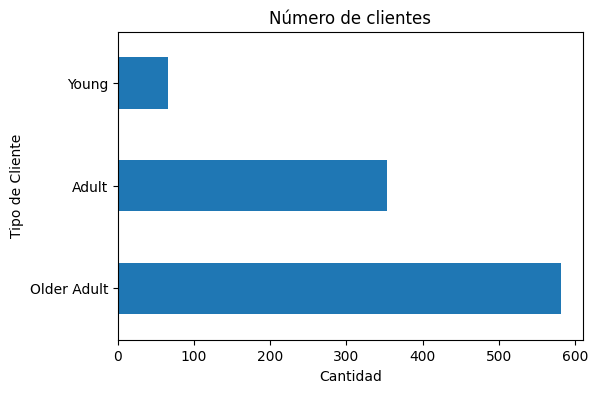

In [ ]:
# Contar el número de clientes por tipo de cliente
count_by_customer_type = cs_experience['Customer_Type'].value_counts()
print(count_by_customer_type)

# Definir tamaño del gráfico
plt.figure(figsize=(6,4))

# Obtener los datos graficar y asignar el tipo de gráfico
cs_experience['Customer_Type'].value_counts().plot(kind='barh')

plt.title('Número de clientes')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Cliente')

plt.show()

Gender  Customer_Type
Female  Older Adult      275
        Adult            169
        Young             32
Male    Older Adult      306
        Adult            184
        Young             34
Name: count, dtype: int64


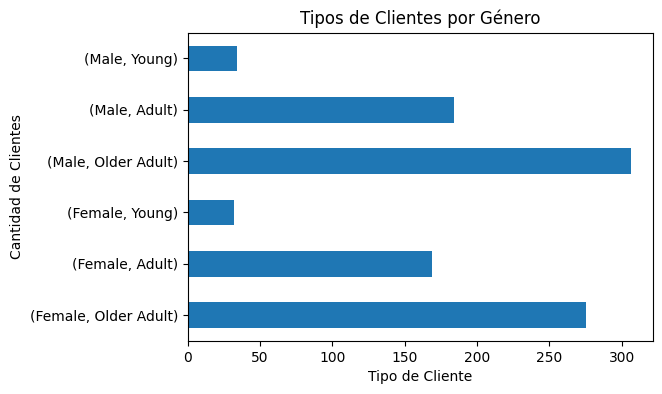

In [ ]:
# Definir los tipos de clientes por género
count_type_by_gender = cs_experience.groupby('Gender')['Customer_Type'].value_counts()
print(count_type_by_gender)

# Realizar la gráfica de barras para comparar los valores
plt.figure(figsize=(6,4))
cs_experience.groupby('Gender')['Customer_Type'].value_counts().plot(kind='barh')

plt.title('Tipos de Clientes por Género')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Cantidad de Clientes')

plt.show()

In [ ]:
# ¿Cuánto tiempo en total gastaron en tienda los tipos de clientes?
# Se hace un agrupamiento por customer type para calcular la suma del tiempo en la columna time spend on site
customer_group = cs_experience.groupby('Customer_Type')['Time_Spent_on_Site'].sum()
print(customer_group)

Customer_Type
Adult          11287.084846
Older Adult    18671.191617
Young           2316.122775
Name: Time_Spent_on_Site, dtype: float64


In [ ]:
# ¿Cuánto tiempo en total por genero y tipo de cliente?
# Se hace un doble agrupamiento, primero por genero y despues por customer type
customer_group_gender = cs_experience.groupby(['Gender','Customer_Type'])['Time_Spent_on_Site'].sum()
print(customer_group_gender)
# Análisis: Los hombres gastan más tiempo en la tienda sin importar la edad en comparación con las mujeres

Gender  Customer_Type
Female  Adult            5457.429112
        Older Adult      8850.640560
        Young            1111.495156
Male    Adult            5829.655734
        Older Adult      9820.551057
        Young            1204.627619
Name: Time_Spent_on_Site, dtype: float64


Gender  Customer_Type  Retention_Status
Female  Adult          Retained            116
                       Churned              53
        Older Adult    Retained            187
                       Churned              88
        Young          Retained             23
                       Churned               9
Male    Adult          Retained            136
                       Churned              48
        Older Adult    Retained            210
                       Churned              96
        Young          Retained             22
                       Churned              12
Name: count, dtype: int64


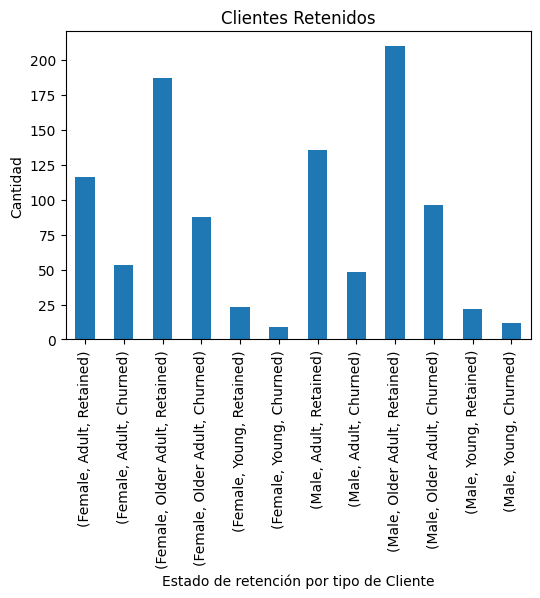

In [ ]:
# ¿Qué grupos de edad muestran mayor fidelidad (retención)?
# El análisis se realiza a partir del Customer_Type que se basa en la edad y el Retention_Status
retention_rate = cs_experience.groupby(['Gender','Customer_Type'])['Retention_Status'].value_counts()
print(retention_rate)

# Definir el tamaño del gráfico
plt.figure(figsize=(6,4))

#Genera la gráfica de barras
cs_experience.groupby(['Gender','Customer_Type'])['Retention_Status'].value_counts().plot(kind='bar')

plt.title('Clientes Retenidos')
plt.xlabel('Estado de retención por tipo de Cliente')
plt.ylabel('Cantidad')

plt.show()

In [ ]:
# ¿Cuánto tiempo pasan en el sitio los clientes que compran más de 10 productos?
# 1. Definir una función categorizar de acuerdo a la cantidad de productos comprados
def categ_product_purchased(num_products):
  if num_products >= 10:
    return True
  else:
    return False

cs_experience['more_10'] = cs_experience['Products_Purchased'].apply(categ_product_purchased) # Nueva columna con la clasificación por productos comprados
cs_experience.head(10)

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded,Customer_Type,more_10
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1,Older Adult,True
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1,Older Adult,False
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0,Older Adult,True
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0,Adult,False
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1,Older Adult,False
5,6,25,Male,Rural,6,2,4,35,46.215846,3,Retained,1,0,1,Adult,False
6,7,38,Male,Suburban,8,4,18,11,55.481249,9,Churned,1,1,0,Adult,True
7,8,56,Female,Rural,10,4,11,8,10.941593,1,Retained,0,0,1,Older Adult,True
8,9,36,Female,Suburban,6,2,5,23,17.795015,5,Churned,0,1,0,Adult,False
9,10,40,Male,Rural,12,3,15,46,46.264344,2,Retained,1,0,1,Adult,True


In [ ]:
# 2. Filtrar por categoria de los productos comprados si son mayores a 10
time_spent = cs_experience[cs_experience['more_10'] == True]
print(time_spent.loc[:,['Gender','Products_Purchased','Time_Spent_on_Site','more_10']].head(10)) # Visualizar solo determinadas columnas con 'loc'

    Gender  Products_Purchased  Time_Spent_on_Site  more_10
0     Male                  18           18.319606     True
2     Male                  11           45.921572     True
6     Male                  18           55.481249     True
7   Female                  11           10.941593     True
9     Male                  15           46.264344     True
10    Male                  18           20.097867     True
12    Male                  11            9.464032     True
13  Female                  13           29.871136     True
16  Female                  11           49.828966     True
18    Male                  15           47.525093     True


In [ ]:
# 3. Obtener un promedio del tiempo
mean_time = time_spent['Time_Spent_on_Site'].mean()
print(mean_time)

print(cs_experience['more_10'].value_counts())

32.326856124856995
more_10
True     567
False    433
Name: count, dtype: int64


In [ ]:
# Tiempo promedio por género
mean_by_gender = cs_experience.groupby('Gender')['Time_Spent_on_Site'].mean()
print(mean_by_gender)

Gender
Female    32.394044
Male      32.165715
Name: Time_Spent_on_Site, dtype: float64
